In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Salaries.csv')

/home/jalaj/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.describe()

,Id,TotalPay,TotalPayBenefits,Year
count,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,74768.321972,93692.554811,2012.522643
std,42912.857795,50517.005274,62793.533483,1.117538
min,1.000000,-618.130000,-618.130000,2011.000000
25%,37164.250000,36168.995000,44065.650000,2012.000000
50%,74327.500000,71426.610000,92404.090000,2013.000000
75%,111490.750000,105839.135000,132876.450000,2014.000000
max,148654.000000,567595.430000,567595.430000,2014.000000


In [4]:
#BasePay, OtherPay, OvertimePay and Benefits should be numeric values but due to the presence of the value "Not Provided" these feilds are not recognised as numeric but rather as string/text feilds

In [5]:
#dropping rows with values as "Not Provided"
df = df[df.Benefits != "Not Provided"]
df = df[df.TotalPay != "Not Provided"]

/home/jalaj/.local/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [6]:
#converting these feilds to numeric
df.BasePay = pd.to_numeric(df.BasePay)
df.OtherPay = pd.to_numeric(df.OtherPay)
df.OvertimePay = pd.to_numeric(df.OvertimePay)
df.Benefits = pd.to_numeric(df.Benefits)

In [7]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148650.000000,148045.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000
mean,74325.500047,66325.448840,5066.059886,3648.767297,20906.772746,74770.333901,93695.075969,2012.522603
std,42911.703176,42764.635495,11454.380559,8056.601866,16955.512494,50516.196009,62792.497391,1.117526
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37163.250000,33588.200000,0.000000,0.000000,1864.000000,36169.955000,44073.337500,2012.000000
50%,74325.500000,65007.450000,0.000000,811.270000,25101.310000,71427.240000,92406.020000,2013.000000
75%,111487.750000,94691.050000,4658.175000,4236.065000,33930.697500,105842.960000,132877.992500,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,400184.250000,567595.430000,567595.430000,2014.000000


In [8]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,400184.25,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,382943.26,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,122540.78,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,254427.61,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,191971.59,326373.19,326373.19,2011,San Francisco


In [9]:
#printing missing values
print(df.isnull().sum())

Id                    0
EmployeeName          0
JobTitle              0
BasePay             605
OvertimePay           0
OtherPay              0
Benefits              0
TotalPay              0
TotalPayBenefits      0
Year                  0
Agency                0
dtype: int64


In [10]:
#handling numerical missing values
df2 = df.fillna(df.mean())
print(df2.isnull().sum())

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


In [11]:
#there are no categorical fields with null data
#however there the field BasePay still has missing values
#hence we will handle them by dropping them

In [12]:
#now we don't have any more missing values...

In [13]:
%matplotlib inline

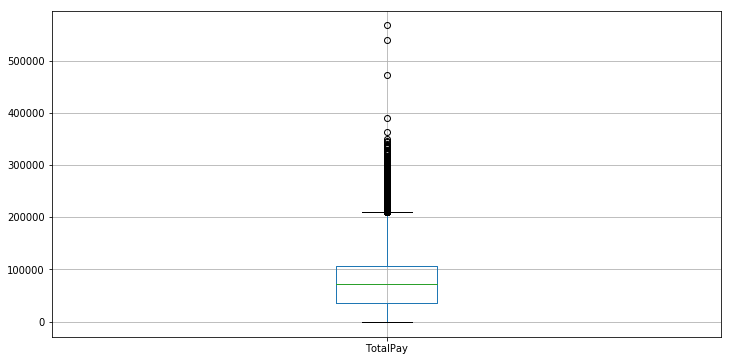

In [14]:
#handling outliers
df.boxplot("TotalPay", figsize=(12, 6))

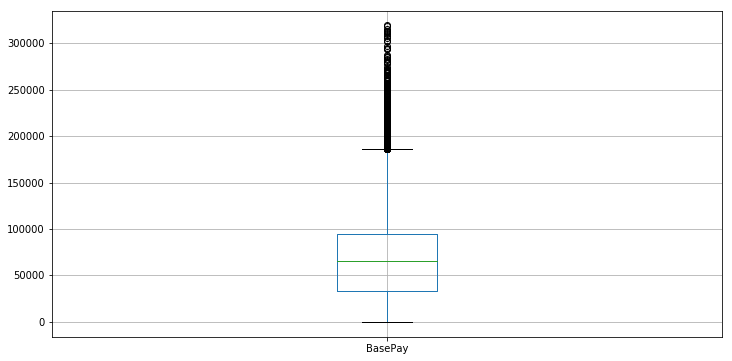

In [15]:
df.boxplot("BasePay", figsize=(12, 6))

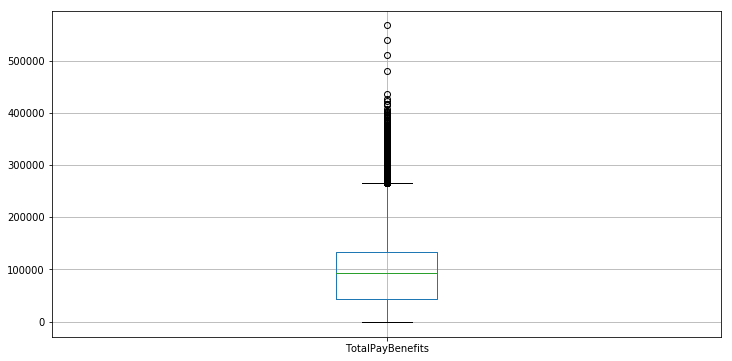

In [16]:
df.boxplot("TotalPayBenefits", figsize=(12, 6))

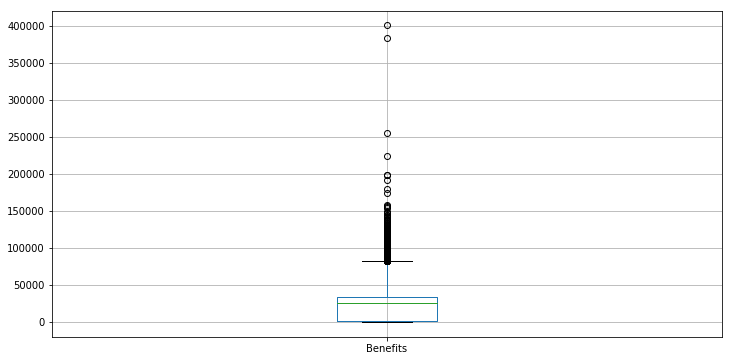

In [17]:
df.boxplot("Benefits", figsize=(12, 6))

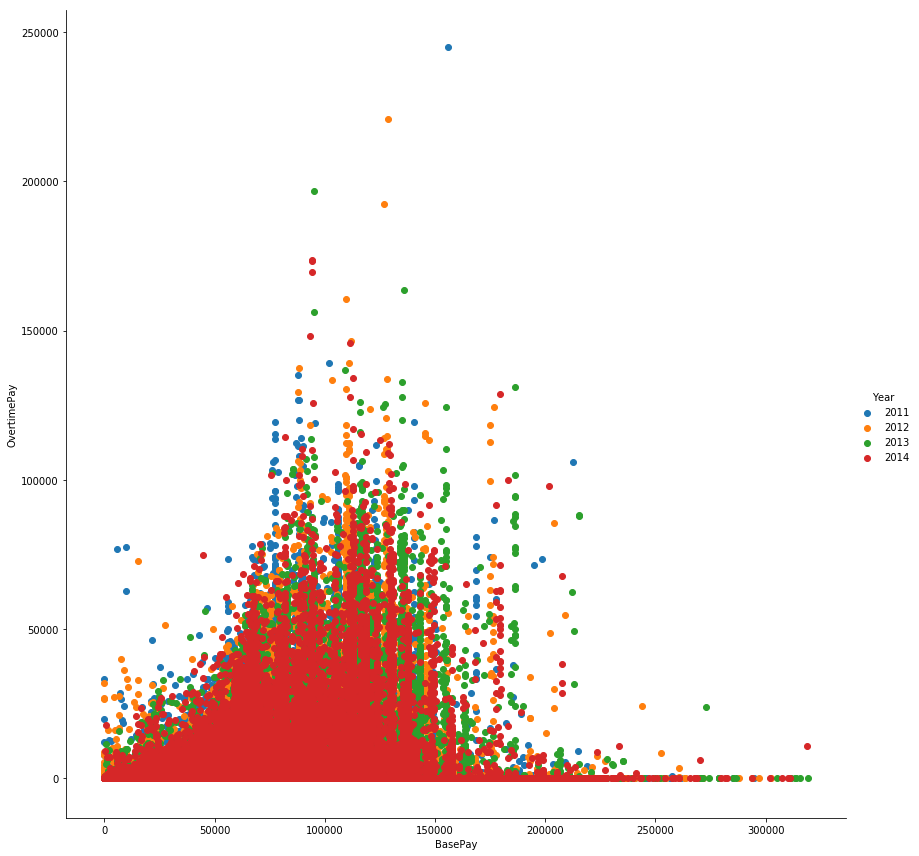

In [19]:
sns.FacetGrid(df, hue="Year", size=12) \
   .map(plt.scatter, "BasePay", "OvertimePay") \
   .add_legend()

In [21]:
#doing min-max normalisations on TotalPay and TotalPayBemefits
df3 = df
df3.TotalPay=(df3.TotalPay-df3.TotalPay.min())/(df3.TotalPay.max()-df3.TotalPay.min())
df3.TotalPayBenefits=(df3.TotalPayBenefits-df3.TotalPayBenefits.min())/(df3.TotalPayBenefits.max()-df3.TotalPayBenefits.min())

In [22]:
df3.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148650.000000,148045.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000
mean,74325.500047,66325.448840,5066.059886,3648.767297,20906.772746,0.132676,0.165982,2012.522603
std,42911.703176,42764.635495,11454.380559,8056.601866,16955.512494,0.088904,0.110509,1.117526
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,0.000000,0.000000,2011.000000
25%,37163.250000,33588.200000,0.000000,0.000000,1864.000000,0.064743,0.078653,2012.000000
50%,74325.500000,65007.450000,0.000000,811.270000,25101.310000,0.126793,0.163713,2013.000000
75%,111487.750000,94691.050000,4658.175000,4236.065000,33930.697500,0.187361,0.234940,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,400184.250000,1.000000,1.000000,2014.000000


In [46]:
#data reduction
#removing useless atrribute - Id, Benefits and Agency
#Benefits is sum of OtherPay and OvertimePay and hence need not be considered again
#all the data is from the SAN FRANCISCO agency hence it also is redundant can be dropped

In [49]:
df5 = df3
df5 = df5.drop(columns=['Id', 'Agency','Benefits'])

In [50]:
df5

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,1.000000,1.000000,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.949515,0.949515,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.591148,0.591148,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.585980,0.585980,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.575473,0.575473,2011
5,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,0.557720,0.557720,2011
6,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,0.557183,0.557183,2011
7,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,0.542961,0.542961,2011
8,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,0.535091,0.535091,2011
9,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,0.533243,0.533243,2011


In [51]:
#data conversion
#using OvertimePay data to determine whether a person does overtime or not

In [52]:
bins = list()
for data in df5['OvertimePay']:
    if float(data) == 0:
        bins.append("No")
    else:
        bins.append("Yes")
#adding this data to the dataset...
s = pd.Series(bins)
df5['DoesOvertime'] = s.values

In [53]:
df5.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,DoesOvertime
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,1.000000,1.000000,2011,No
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.949515,0.949515,2011,Yes
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.591148,0.591148,2011,Yes
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.585980,0.585980,2011,Yes
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.575473,0.575473,2011,Yes


In [54]:
#converting BasePay to categorical data

In [55]:
bins = list()
for data in df5['BasePay']:
    if (data) <= 50000:
        bins.append("very low")
    elif (data > 50000) & (data <= 200000):
        bins.append("low")
    elif (data > 200000) & (data <= 350000):
        bins.append("medium")
    elif (data > 350000) & (data <= 500000):
        bins.append("high")
    else:
        bins.append("very high")


In [56]:
df5.BasePay = bins

In [57]:
df5.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,DoesOvertime
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,low,0.00,400184.25,1.000000,1.000000,2011,No
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),low,245131.88,137811.38,0.949515,0.949515,2011,Yes
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),medium,106088.18,16452.60,0.591148,0.591148,2011,Yes
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,low,56120.71,198306.90,0.585980,0.585980,2011,Yes
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",low,9737.00,182234.59,0.575473,0.575473,2011,Yes


In [58]:
#converting Otherpay to categorical data 
#categories : less, fair, extravagent

In [60]:
bins = list()
for data in df5['OtherPay']:
    if (data) <= 50000:
        bins.append("low")
    elif (data > 50000) & (data <= 300000):
        bins.append("fair")
    else:
        bins.append("extravagent")
        
df5.OtherPay = bins

In [61]:
df5.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,DoesOvertime
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,low,0.00,extravagent,1.000000,1.000000,2011,No
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),low,245131.88,fair,0.949515,0.949515,2011,Yes
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),medium,106088.18,low,0.591148,0.591148,2011,Yes
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,low,56120.71,fair,0.585980,0.585980,2011,Yes
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",low,9737.00,fair,0.575473,0.575473,2011,Yes


In [62]:
#we will be looking for whether the person does a overtime or not

In [63]:
#hence we will be dropping the OvertimePay attribute

In [64]:
df6 = df5.drop(columns=['OvertimePay'])

In [65]:
df6.head()

,EmployeeName,JobTitle,BasePay,OtherPay,TotalPay,TotalPayBenefits,Year,DoesOvertime
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,low,extravagent,1.000000,1.000000,2011,No
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),low,fair,0.949515,0.949515,2011,Yes
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),medium,low,0.591148,0.591148,2011,Yes
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,low,fair,0.585980,0.585980,2011,Yes
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",low,fair,0.575473,0.575473,2011,Yes


In [66]:
bins = list()
for data in df6['TotalPay']:
    if int(data) <= 0.2:
        bins.append("very low")
    elif (data > 0.2) & (data <= 0.4):
        bins.append("low")
    elif (data > 0.4) & (data <= 0.6):
        bins.append("medium")
    elif (data > 0.6) & (data <= 0.8):
        bins.append("high")
    else:
        bins.append("very high")
        
df6.TotalPay = bins

In [67]:
df6.head()

,EmployeeName,JobTitle,BasePay,OtherPay,TotalPay,TotalPayBenefits,Year,DoesOvertime
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,low,extravagent,very high,1.000000,2011,No
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),low,fair,very low,0.949515,2011,Yes
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),medium,low,very low,0.591148,2011,Yes
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,low,fair,very low,0.585980,2011,Yes
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",low,fair,very low,0.575473,2011,Yes


In [68]:
#we also do not need EmployeeName column

In [69]:
df6 = df6.drop(columns=['EmployeeName'])

In [70]:
df6.head()

,JobTitle,BasePay,OtherPay,TotalPay,TotalPayBenefits,Year,DoesOvertime
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,low,extravagent,very high,1.000000,2011,No
1,CAPTAIN III (POLICE DEPARTMENT),low,fair,very low,0.949515,2011,Yes
2,CAPTAIN III (POLICE DEPARTMENT),medium,low,very low,0.591148,2011,Yes
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,low,fair,very low,0.585980,2011,Yes
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",low,fair,very low,0.575473,2011,Yes
